# Building a fashion recommendation system using image features involves several key steps, leveraging both computer vision and machine learning techniques.

In [1]:
import zipfile
import os

In [36]:
zip_file_path = 'women-fashion.zip'
extraction_directory = 'women fashion'

In [3]:
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

In [4]:
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

In [5]:
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['.DS_Store', 'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'Anarkali suit with a modern twist.jpg', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'black and white gingham checkered A-line dress with a flared skirt.jpg']


In [6]:
#lets correct the path to include the 'woman fashion' and directory and listed its contents
extracted_directory_updates=os.path.join(extraction_directory,'women fashion')

In [7]:
#list the files in the updated directory
extracted_files_updated= os.listdir(extracted_directory_updates)

In [8]:
extracted_files_updated[:10],len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

In [9]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [10]:
from PIL import Image 
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

In [3]:
#Now, let’s have a look at the first image from the dataset:

In [11]:
def display_image(file_path):
    try:
        image = Image.open(file_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except UnidentifiedImageError:
        print(f"Cannot identify image file {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [12]:
def is_image_file(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()
        return True
    except (UnidentifiedImageError, IOError):
        return False

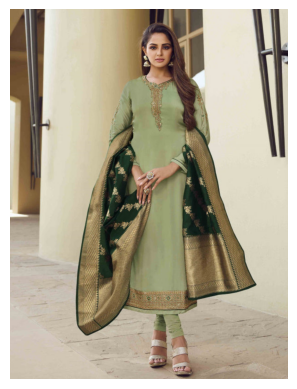

In [13]:
image_files = [f for f in extracted_files_updated if is_image_file(os.path.join(extracted_directory_updates, f))]

# Display the first image to understand its characteristics
if image_files:
    first_image_path = os.path.join(extracted_directory_updates, image_files[0])
    display_image(first_image_path)
else:
    print("No valid image files found.")

In [4]:
#Now, we will create a list of all image file paths that will be used later in extracting the features from every image in the dataset:

In [14]:
import glob

In [56]:
image_directory='women fashion'
image_paths_list=[file for file in glob.glob(os.path.join(image_directory,'*.*'))if file.endswith(('.jpg','.png','jpeg','.webp'))]
print(image_paths_list)

['women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'women fashion\\Anarkali suit with a modern twist.jpg', 'women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'women fashion\\beige top adorned with black dots and a green skirt.jpg', 'women fashion\\black and white gingham checkered A-line dress with a flared skirt.jpg', 'women fashion\\black double-breasted

In [19]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [21]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 62s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━

#In the above code, a feature extraction process is implemented using the VGG16 model, a popular convolutional neural network pre-trained on the ImageNet dataset, to extract visual features from images stored in image_paths_list.

In [24]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
#We can see in the code, we defined a function recommend_fashion_items_cnn, which recommends fashion items similar to a given input image using deep learning-based feature extraction. It utilizes the VGG16 model to extract high-dimensional feature vectors from images, capturing their visual essence.

# Here’s how we can use this function to recommend images based on a similar fashion in the input image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step


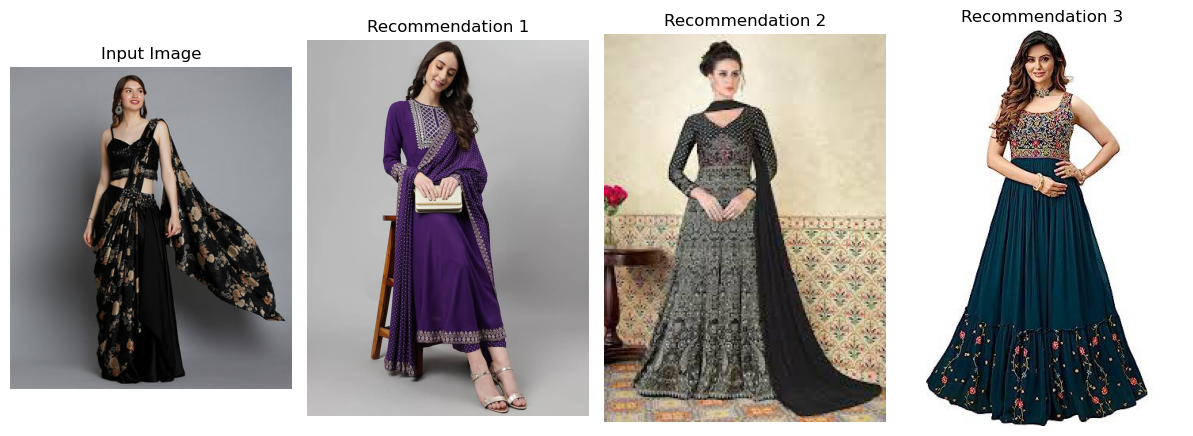

In [58]:
input_image_path = 'women fashion\\black floral saree.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)